# Import das bibliotecas

In [1]:
import bibmon
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\pedro\anaconda3\envs\TCC_env\Lib\site-packages\bibmon\_load_data.py:61: SyntaxWarning: invalid escape sequence '\s'
  train_df = create_df_with_dates(filepath, sep='\s+',names=tags,
c:\Users\pedro\anaconda3\envs\TCC_env\Lib\site-packages\bibmon\_load_data.py:67: SyntaxWarning: invalid escape sequence '\s'
  sep = '\s+',


# Carrega os dados do TEP

In [13]:
# Carrega dados normais (train_id=0) e dados com falha IDV(1) (test_id=1)
df_train, df_test = bibmon.load_tennessee_eastman(train_id=0, test_id=15)

# Criação dos gráficos

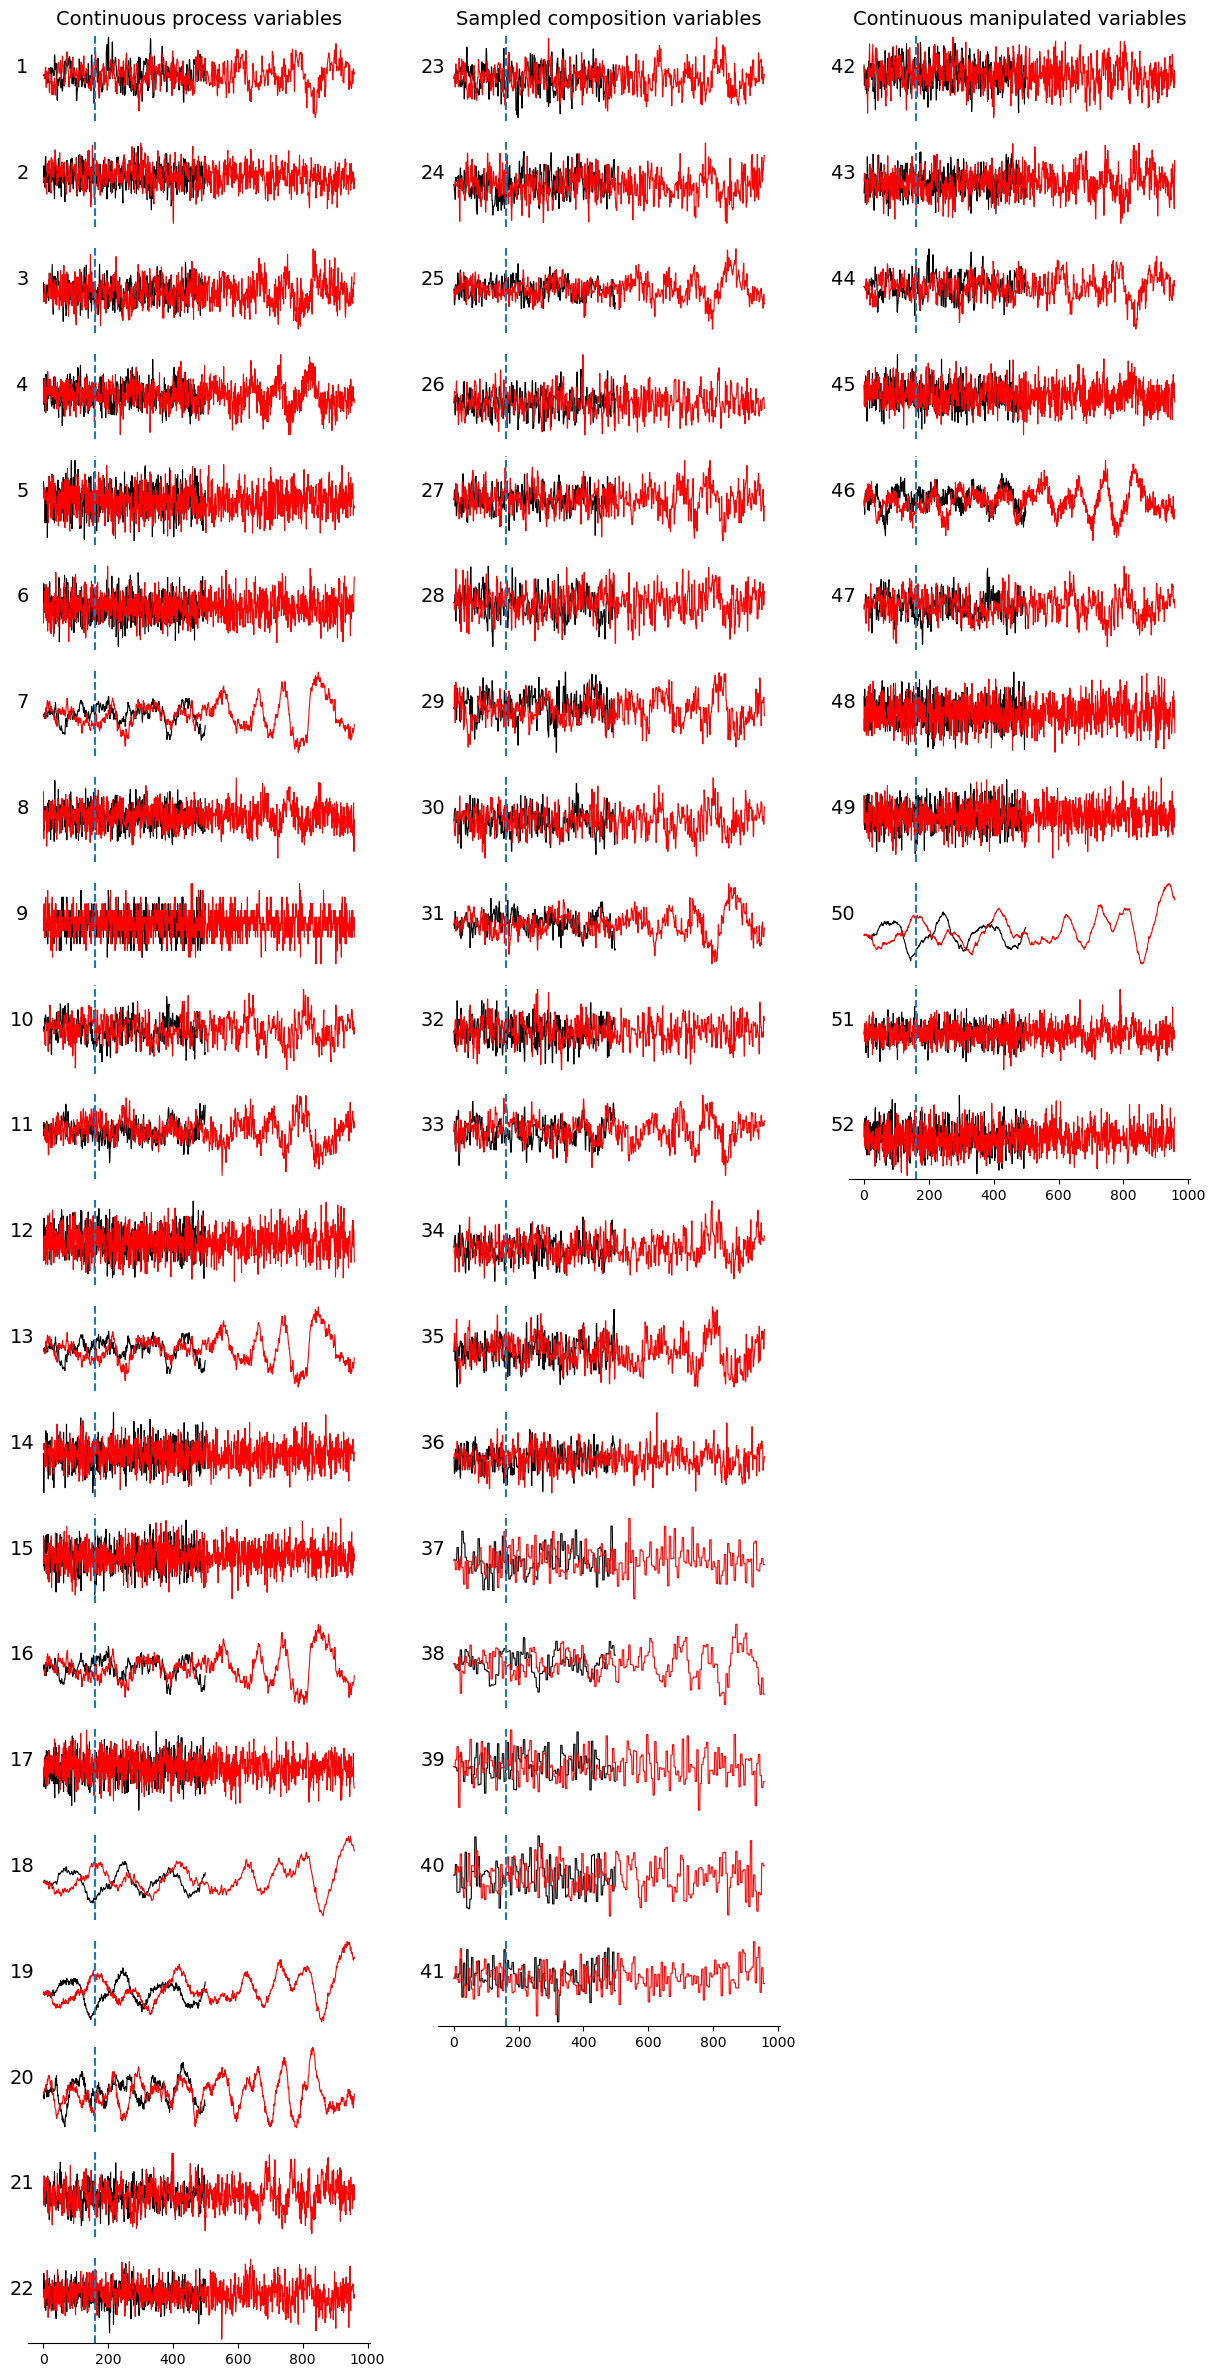

In [14]:
def plot_tep_fault(df_train, df_test):
            
    fig, ax = plt.subplots(22, 3, figsize=(15, 30))

    for i in range(22):
        ax[i,0].plot(df_train.iloc[:,i].values,c='k',linewidth=0.8)
        ax[i,0].plot(df_test.iloc[:,i].values,c='r',linewidth=0.8)
        ax[i,0].axvline(160, ls='--')
        ax[i,0].set_yticks([])
        ax[i,0].set_ylabel(i+1,rotation=0,fontsize=14)
        for j in range(3):
            ax[i,j].spines["top"].set_visible(False)
            ax[i,j].spines["right"].set_visible(False)
            ax[i,j].spines["left"].set_visible(False)
        if i<(22-1):
            ax[i,0].set_xticks([])
            ax[i,0].spines["bottom"].set_visible(False)

    for i in range(19):
        ax[i,1].plot(df_train.iloc[:,i+22].values,c='k',linewidth=0.8)
        ax[i,1].plot(df_test.iloc[:,i+22].values,c='r',linewidth=0.8)
        ax[i,1].axvline(160, ls='--')
        ax[i,1].set_yticks([])
        ax[i,1].set_ylabel(i+23,rotation=0,fontsize=14)
        if i!=(19-1):
            ax[i,1].set_xticks([])
            ax[i,1].spines["bottom"].set_visible(False)

    for i in range(11):
        ax[i,2].plot(df_train.iloc[:,i+41].values,c='k',linewidth=0.8)
        ax[i,2].plot(df_test.iloc[:,i+41].values,c='r',linewidth=0.8)
        ax[i,2].axvline(160, ls='--')
        ax[i,2].set_yticks([])
        ax[i,2].set_ylabel(i+42,rotation=0,fontsize=14)
        if i!=(11-1):
            ax[i,2].set_xticks([])
            ax[i,2].spines["bottom"].set_visible(False)

    for i in range(19,22):
        ax[i,1].axis('off')

    for i in range(11,22):
        ax[i,2].axis('off')

    ax[0,0].set_title('Continuous process variables',fontsize=14)
    ax[0,1].set_title('Sampled composition variables',fontsize=14)
    ax[0,2].set_title('Continuous manipulated variables',fontsize=14);

plot_tep_fault(df_train, df_test)

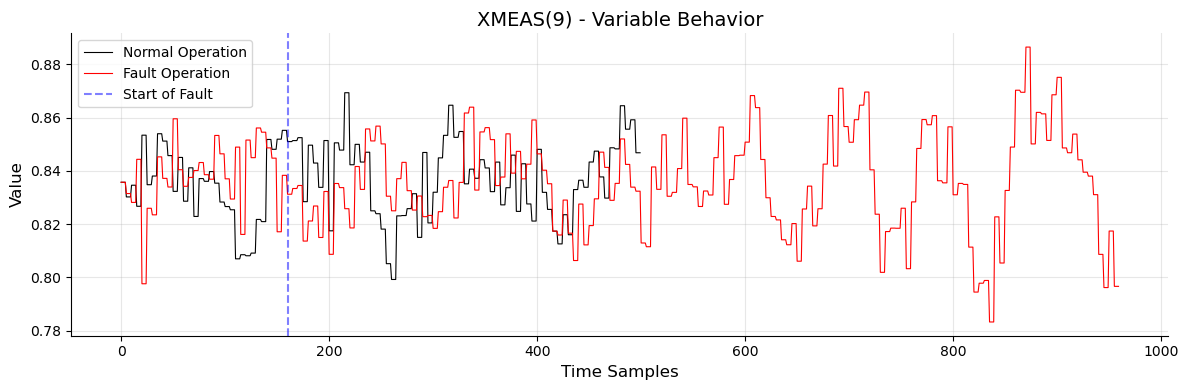

In [17]:
def plot_tep_xmeas9(df_train, df_test):
    plt.figure(figsize=(12, 4))
    
    # Índice da variável XMEAS(9) (ajustar conforme necessidade)
    xmeas_index = 37  # Considerando que XMEAS(1) = índice 0
    
    # Plot dos dados de treino e teste
    plt.plot(df_train.iloc[:, xmeas_index].values, c='k', linewidth=0.8, label='Normal Operation')
    plt.plot(df_test.iloc[:, xmeas_index].values, c='r', linewidth=0.8, label='Fault Operation')
    
    # Linha vertical indicando início da falha
    plt.axvline(160, ls='--', color='b', alpha=0.5, label='Start of Fault')
    
    # Configurações do gráfico
    plt.title('XMEAS(9) - Variable Behavior', fontsize=14)
    plt.xlabel('Time Samples', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Ajustes de spines
    spines = ['top', 'right']
    for s in spines:
        plt.gca().spines[s].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_tep_xmeas9(df_train, df_test)